# Predicting Pulsar Stars
Description & Attribute Information by Dr. Robert Lyon
#### Goal
We will try to predict if a star is a pulsar or not based on features.
#### Description
HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

#### Attribute Information
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

Mean of the integrated profile.
Standard deviation of the integrated profile.
Excess kurtosis of the integrated profile.
Skewness of the integrated profile.
Mean of the DM-SNR curve.
Standard deviation of the DM-SNR curve.
Excess kurtosis of the DM-SNR curve.
Skewness of the DM-SNR curve.
Class
HTRU 2 Summary
17,898 total examples.
1,639 positive examples.
16,259 negative examples.

Source: https://archive.ics.uci.edu/ml/datasets/HTRU2

## Loading & Overviewing Datasets

#### Explore Head Data
We are getting the head of the data (top 5 rows) to explore a bit of the format of the dataset.                                              

In [1]:
import pandas as pd
data = pd.read_csv (r'C:\Users\Ye-An\Desktop\pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# Stage 1 Model Testing
Let's try to make a model that can predict if a star is a pulsar or not with a variety of algorithms.

## Train Test Split
We are splitting the dataset into two sets: a training set and a testing set.
It is important to separate a training and testing set because we need to make sure the model (trained using the training set) has not seen the testing set to get accurate results on the model's accuracy.

In [16]:
from sklearn.model_selection import train_test_split
X = data.drop('target_class',axis=1)
y = data['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Tree Algorithm
Let's try to use the decision tree algorithm on this dataset.

In [17]:
#Creating instance of decision tree object (train test split already done)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

#Printing results from testing
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
dt_cr = classification_report(y_test,predictions)
print("Classification Report")
print(dt_cr)
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4859
           1       0.82      0.81      0.82       511

   micro avg       0.97      0.97      0.97      5370
   macro avg       0.90      0.90      0.90      5370
weighted avg       0.97      0.97      0.97      5370

 
Confusion Matrix
[[4770   89]
 [  97  414]]


## Random Forest Algorithm
Let's try to use the random forest algorithm on this dataset.

In [18]:
#Creating instance of Random Forest object (train test split already done)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train,y_train)

#Print results from testing
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
rf_cr = classification_report(y_test,predictions)
print("Classification Report")
print(rf_cr)
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4859
           1       0.94      0.82      0.87       511

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370

 
Confusion Matrix
[[4830   29]
 [  93  418]]


## Support Vector Machine Algorithm
Let's try to use the SVM algorithm on this dataset.

In [5]:
#Creating instance of SVM object (train test split already done)
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

#Print results from testing
predictions = svc_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
svm_cr = classification_report(y_test,predictions)
print("Classification Report")
print(svm_cr)
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y_test,predictions))

C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4880
           1       1.00      0.02      0.03       490

   micro avg       0.91      0.91      0.91      5370
   macro avg       0.96      0.51      0.49      5370
weighted avg       0.92      0.91      0.87      5370

 
Confusion Matrix
[[4880    0]
 [ 482    8]]


### Conclusions
We noticed that the Random Forest algorithm worked the best, but not with a really great accuracy. Let's see if we can improve it a little bit with feature engineering.

# Stage 1 Feature Engineering

## Recursive feature elimination with cross validation and random forest classification
We will use recursive feature elimination with cross validation & random forest classification because it not only gives the best features but also gives the optimal number of features.
More information about this here: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html 

In [29]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Optimal number of features : 6
Best features : Index([' Mean of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')


#### We have our optimal number of features and the recommended best features:
- Mean of the integrated profile
- Excess kurtosis of the integrated profile
- Skewness of the integrated profile
- Mean of the DM-SNR curve
- Standard deviation of the DM-SNR curve
- Skewness of the DM-SNR

In [32]:
dropList = [' Standard deviation of the integrated profile',' Excess kurtosis of the DM-SNR curve']

# Stage 2 Model Testing

We know that SVM doesn't work well with this data as it is apparently not linearly separable, a requirement of SVM. Let's just try Decision Tree and Random Forest with only 6 optimal features.

## Applying Optimal Features to New Dataset

In [33]:
data_v2 = data.drop(dropList,axis=1)

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
X2 = data_v2.drop('target_class',axis=1)
y2 = data_v2['target_class']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30)

## Decision Tree Algorithm

In [35]:
#Creating instance of decision tree object (train test split already done)
from sklearn.tree import DecisionTreeClassifier
dtree2 = DecisionTreeClassifier()
dtree2.fit(X2_train,y2_train)

#Printing results from testing
predictions = dtree2.predict(X2_test)
from sklearn.metrics import classification_report, confusion_matrix
dt2_cr = classification_report(y2_test,predictions)
print("Classification Report")
print(dt2_cr)
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y2_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4896
           1       0.84      0.82      0.83       474

   micro avg       0.97      0.97      0.97      5370
   macro avg       0.91      0.90      0.90      5370
weighted avg       0.97      0.97      0.97      5370

 
Confusion Matrix
[[4820   76]
 [  87  387]]


## Random Forest Algorithm

In [37]:
#Creating instance of Random Forest object (train test split already done)
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators=100)
rfc2.fit(X2_train,y2_train)

#Print results from testing
predictions = rfc2.predict(X2_test)
from sklearn.metrics import classification_report, confusion_matrix
rf_cr2 = classification_report(y2_test,predictions)
print("Stage 1 RF CR")
print(rf_cr)
print("")
print("Stage 2 RF Classification Report")
print(rf_cr2)
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y2_test,predictions))

Stage 1 RF CR
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4859
           1       0.94      0.82      0.87       511

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370


Stage 2 RF Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4896
           1       0.93      0.83      0.88       474

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370

 
Confusion Matrix
[[4866   30]
 [  80  394]]


# Conclusion
After our feature engineering it seems that we've traded one percentage point from precision (0.94 to 0.93) to recall (0.82 to 0.83).

Let's see if we can get some more accuracy using different feature engineering techniques.

# Stage 2 Feature Engineering

Let's see if we can go back to the original dataset and see if we get some different results for a better result.

### Tree based feature selection and random forest classification

C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 2 (0.420225)
2. feature 0 (0.223384)
3. feature 3 (0.123935)
4. feature 5 (0.068754)
5. feature 4 (0.062588)
6. feature 1 (0.042249)
7. feature 6 (0.031776)
8. feature 7 (0.027088)


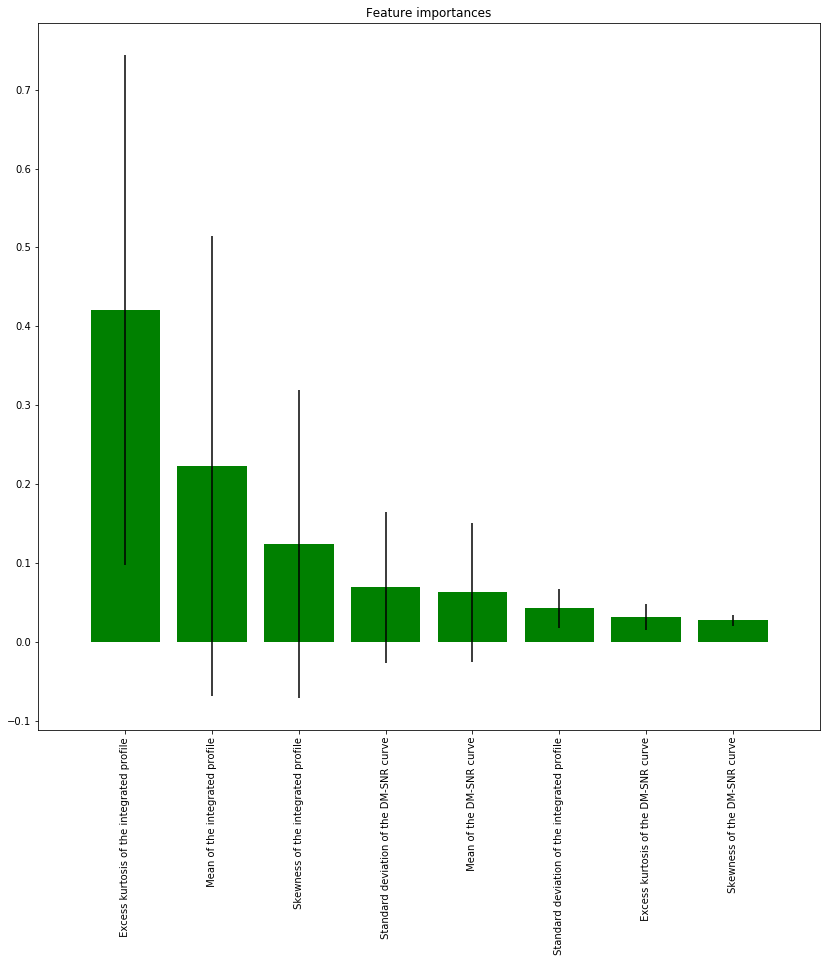

In [28]:
import numpy as np
import matplotlib.pyplot as plt

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Unfortunately there is no sudden drop in ranking, so we cannot use this method to find the optimal number of features. However, we do have some good insights into the importance of features, numerically. 
Let's just try to use the top 6 (a number given by the previous technique) features and see if the model gets some better results.
These are:
- Excess kurtosis of the integrated profile
- Mean of the integrated profile
- Skewness of the integrated profile
- Standard deviation of the DM-SNR curve
- Mean of the DM-SNR curve
- Standard dviation of the integrated profile

In [38]:
dropList2 = [' Excess kurtosis of the DM-SNR curve',' Skewness of the DM-SNR curve']
data_v3 = data.drop(dropList2,axis=1)

# Stage 3 Model Testing
## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X3 = data_v3.drop('target_class',axis=1)
y3 = data_v3['target_class']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30)

## Decision Tree

In [40]:
#Creating instance of decision tree object (train test split already done)
from sklearn.tree import DecisionTreeClassifier
dtree3 = DecisionTreeClassifier()
dtree3.fit(X3_train,y3_train)

#Printing results from testing
predictions = dtree3.predict(X3_test)
from sklearn.metrics import classification_report, confusion_matrix
dt_cr3 = classification_report(y3_test,predictions)
print("Classification Report")
print(dt_cr3)
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y3_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4871
           1       0.82      0.82      0.82       499

   micro avg       0.97      0.97      0.97      5370
   macro avg       0.90      0.90      0.90      5370
weighted avg       0.97      0.97      0.97      5370

 
Confusion Matrix
[[4782   89]
 [  89  410]]


## Random Forest

In [42]:
#Creating instance of Random Forest object (train test split already done)
from sklearn.ensemble import RandomForestClassifier
rfc3 = RandomForestClassifier(n_estimators=100)
rfc3.fit(X3_train,y3_train)

#Print results from testing
predictions = rfc3.predict(X3_test)
from sklearn.metrics import classification_report, confusion_matrix
rf_cr3 = classification_report(y3_test,predictions)
print("Stage 2 RF CR")
print(rf_cr2)
print("")
print("Stage 3 RF Classification Report")
print(rf_cr3)
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y3_test,predictions))

Stage 2 RF CR
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4896
           1       0.93      0.83      0.88       474

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370


Stage 3 RF Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4871
           1       0.93      0.82      0.87       499

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.95      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370

 
Confusion Matrix
[[4838   33]
 [  90  409]]


# Stage 3 Feature Engineering

### Recursive feature elimination (RFE) with random forest

In [43]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=6, step=1)
rfe = rfe.fit(X_train, y_train)

C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ye-An\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
print('Chosen best 6 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 6 feature by rfe: Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')


In [49]:
dropList4 = [' Excess kurtosis of the DM-SNR curve',' Standard deviation of the DM-SNR curve']
data_v4 = data.drop(dropList3, axis=1)

# Stage 4 Model Testing
## TrainTest Split

In [50]:
from sklearn.model_selection import train_test_split
X4 = data_v4.drop('target_class',axis=1)
y4 = data_v4['target_class']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30)

## Decision Tree

In [51]:
#Creating instance of decision tree object (train test split already done)
from sklearn.tree import DecisionTreeClassifier
dtree4 = DecisionTreeClassifier()
dtree4.fit(X4_train,y4_train)

#Printing results from testing
predictions = dtree4.predict(X4_test)
from sklearn.metrics import classification_report, confusion_matrix
dt_cr4 = classification_report(y4_test,predictions)
print("Classification Report")
print(dt_cr4)
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y4_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4872
           1       0.81      0.86      0.83       498

   micro avg       0.97      0.97      0.97      5370
   macro avg       0.90      0.92      0.91      5370
weighted avg       0.97      0.97      0.97      5370

 
Confusion Matrix
[[4775   97]
 [  72  426]]


## Random Forest

In [52]:
#Creating instance of Random Forest object (train test split already done)
from sklearn.ensemble import RandomForestClassifier
rfc4 = RandomForestClassifier(n_estimators=100)
rfc4.fit(X4_train,y4_train)

#Print results from testing
predictions = rfc4.predict(X4_test)
from sklearn.metrics import classification_report, confusion_matrix
rf_cr4 = classification_report(y4_test,predictions)
print("Stage 4 RF Classification Report")
print(rf_cr4)
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y4_test,predictions))

Stage 4 RF Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4872
           1       0.94      0.86      0.90       498

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.96      0.93      0.94      5370
weighted avg       0.98      0.98      0.98      5370

 
Confusion Matrix
[[4843   29]
 [  70  428]]


After testing out decision tree four times it seems that it never stands up to Random Forest, so we can just ignore decision tree in future model testing.
Our model has improved a lot from the previous best model.

# Conclusion
Our best model came after trying many feature engineering methods and different algorithms. Although we didn't end up with a really great accuracy that would be needed to employ this model in real life, we improved our initial model a lot.